# Predicting House Values

In [94]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
import missingno as msno

In [96]:
df=pd.read_csv('housing.csv')

### Missing values

In [97]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:>

<Figure size 432x432 with 0 Axes>

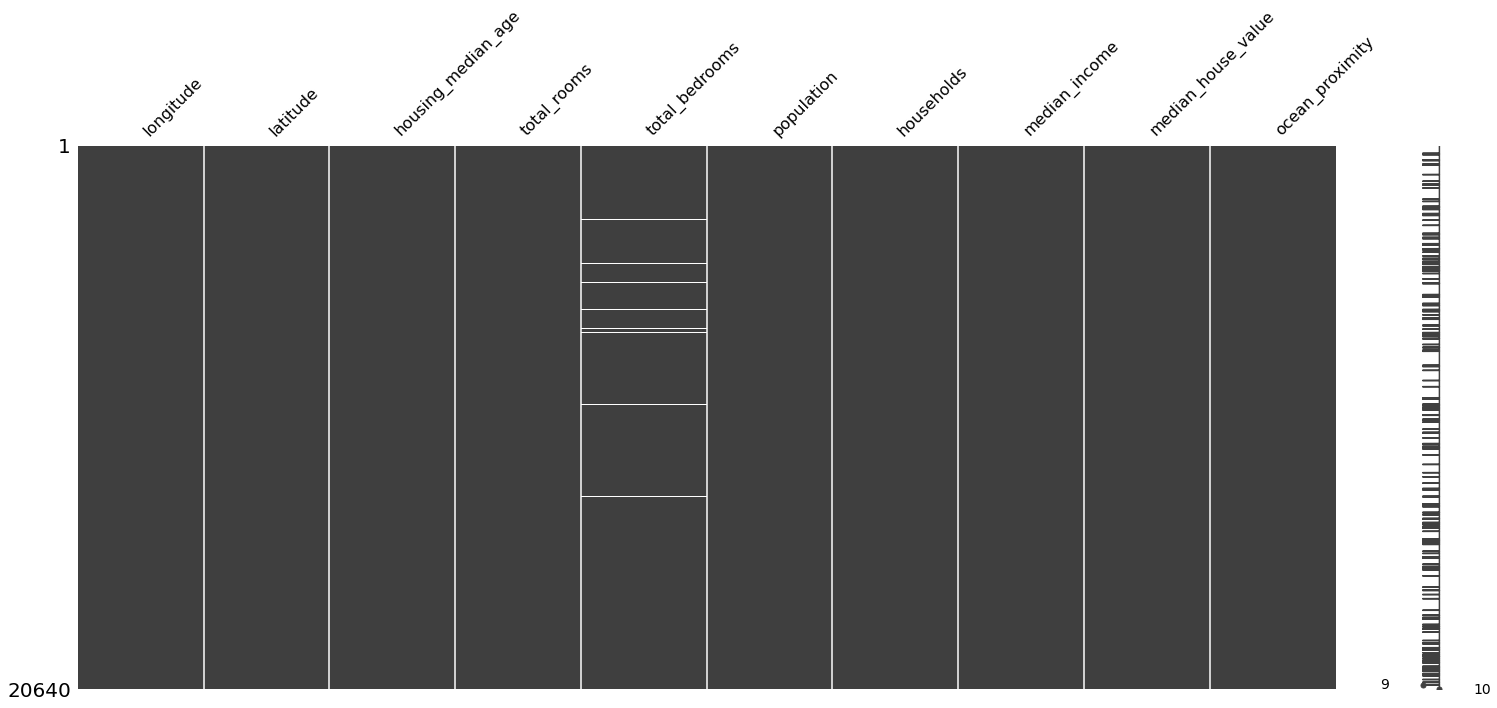

In [107]:
plt.figure(figsize=(6,6))
msno.matrix(df)

In [ ]:
df.na

### Visualizations

C:\Users\KKI27\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bedrooms', ylabel='Density'>

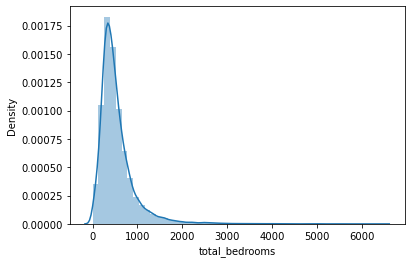

In [9]:
plt.figure(figsize=(6,6))
sns.distplot(df['total_bedrooms'],title='Total Bedrooms Histogram',size=16)
plt.xlabel('Total Bedrooms')
plt.ylabel

C:\Users\KKI27\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bedrooms'>

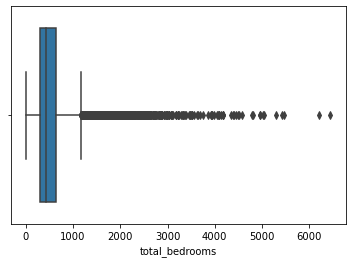

In [10]:
sns.boxplot(df['total_bedrooms'])

In [11]:
df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].median()).astype(int)

C:\Users\KKI27\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

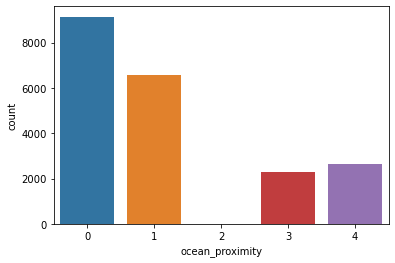

In [89]:
sns.countplot(df['ocean_proximity'])

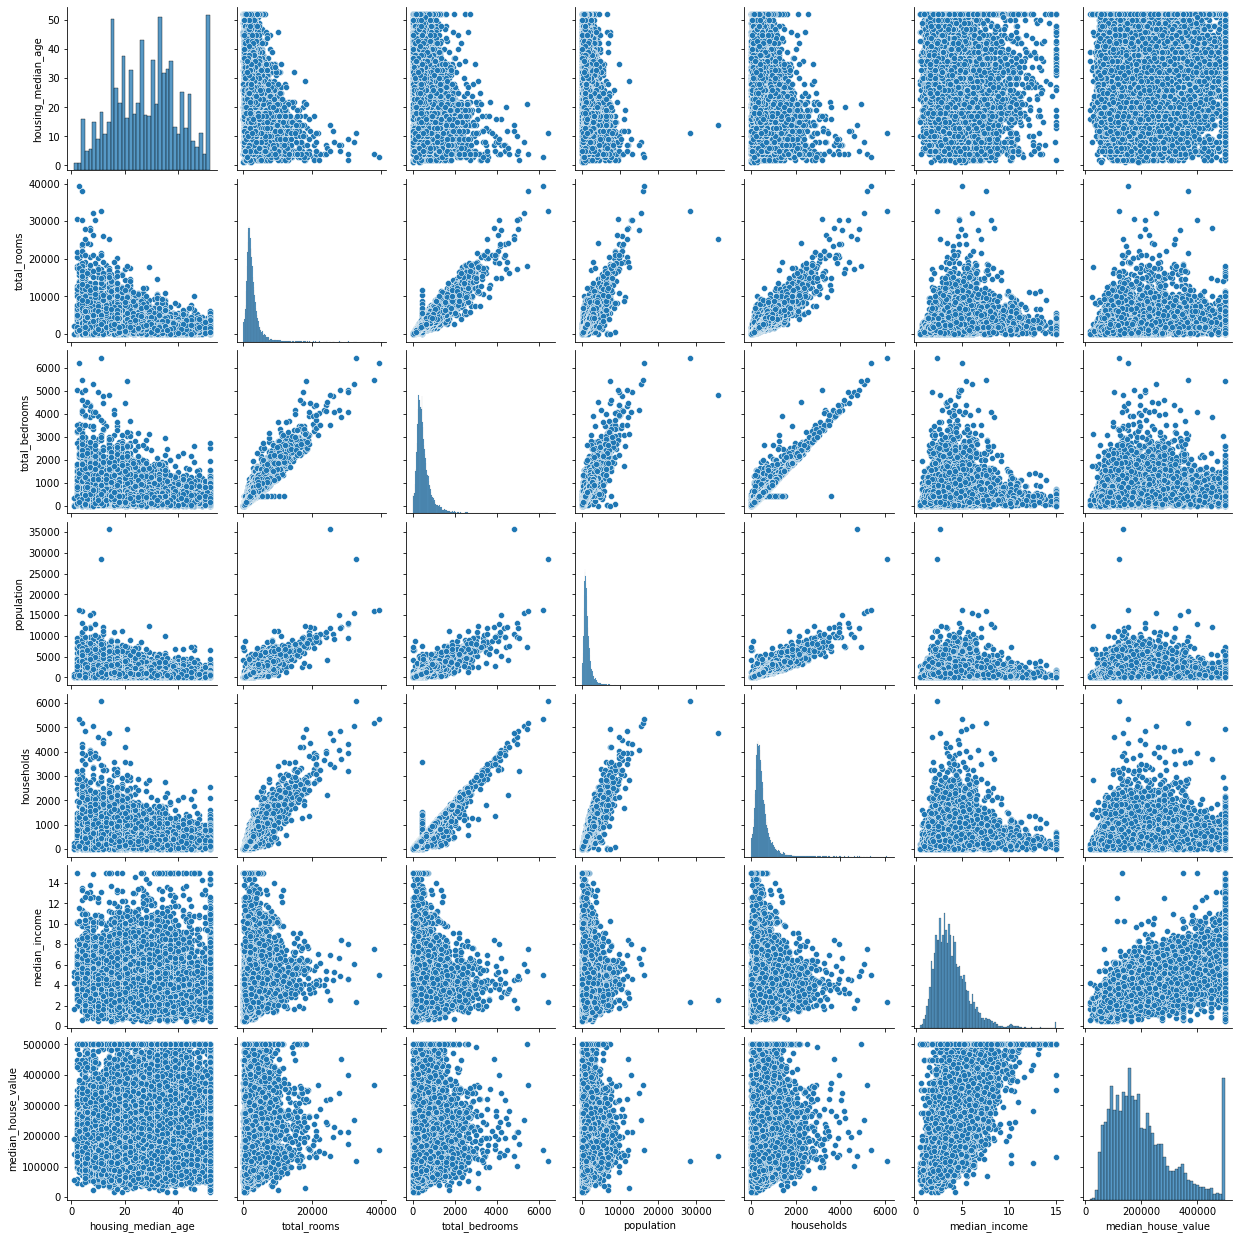

In [91]:
columns=['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']
sns.pairplot(df[columns])

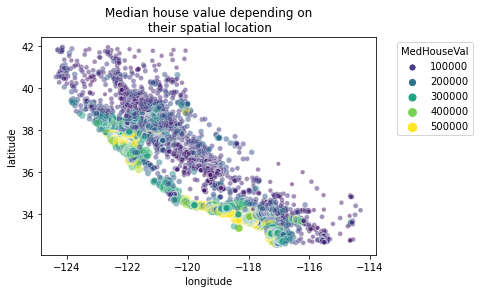

In [114]:
###Visualization of latitude and longitude
sns.scatterplot(data=df,
                x="longitude", y="latitude",
                size="median_house_value", hue="median_house_value",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 1),
           loc="upper left")
_ = plt.title("Median house value depending on\n their spatial location")

In [13]:
# Encoding

In [14]:
le=LabelEncoder()

In [15]:
df['ocean_proximity']=le.fit_transform(df['ocean_proximity'])

In [16]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280,565.0,259.0,3.8462,342200.0,3


In [17]:
X=df.drop('median_house_value',axis=1)
y=df['median_house_value']

In [18]:
# Scaling

In [19]:
sc=StandardScaler()

In [20]:
X=sc.fit_transform(X)

In [21]:
# Modelling

In [22]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [24]:
lr=LinearRegression()

In [25]:
lr.fit(X_train,y_train)

LinearRegression()

In [110]:
pd.DataFrame({'Coefficients':lr.coef_,'Features':df.columns[df.columns!='median_house_value']}) 

,Coefficients,Features
0,-85764.639173,longitude
1,-90916.269169,latitude
2,14904.333837,housing_median_age
3,-17750.038324,total_rooms
4,48812.686550,total_bedrooms
5,-43707.119960,population
6,17664.338712,households
7,76963.396051,median_income
8,-452.934805,ocean_proximity


In [26]:
y_pred=lr.predict(X_test)
print('The mean square error value is', np.sqrt(mean_squared_error(y_pred,y_test)))
print('The r2_score is', np.sqrt(r2_score(y_pred,y_test)))

The mean square error value is 71147.87146118375
The r2_score is 0.645246612493803


In [27]:
# xgboost
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
print('The mean square error value is', np.sqrt(mean_squared_error(y_pred,y_test)))
print('The r2_score value is', np.sqrt(r2_score(y_pred,y_test)))

The mean square error value is 48463.7779979613
The r2_score value is 0.8886569039197206


In [28]:
# Random forest - Small difference to default values
rf=RandomForestRegressor(bootstrap=False,criterion='squared_error',max_depth=70,max_features='sqrt',
                        max_leaf_nodes=None,min_impurity_decrease=0.0,min_samples_leaf=1,min_samples_split=2,
                        min_weight_fraction_leaf=0.0,n_estimators=630,n_jobs=1,oob_score=False,verbose=0,warm_start=False)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print('The mean square error value is', np.sqrt(mean_squared_error(y_pred,y_test)))
print('The r2_score is', np.sqrt(r2_score(y_pred,y_test)))

The mean square error value is 48430.750752067936
The r2_score is 0.8757296527265684


<AxesSubplot:>

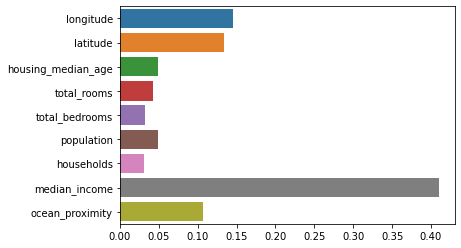

In [29]:
#Feature importance
sns.barplot(data={'importance':rf.feature_importances_,'feature':df.columns[df.columns!='median_house_value']},
           y='feature',x='importance')

In [30]:
#Decision Tree Regression
tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
print('The mean square error value is', np.sqrt(mean_squared_error(y_pred,y_test)))
print('The r2_score is', np.sqrt(r2_score(y_pred,y_test)))

The mean square error value is 67761.26781564292
The r2_score is 0.8102485694454722


In [31]:
# Light GBM Regression
lgbm=LGBMRegressor()
lgbm.fit(X_train,y_train)
y_pred=lgbm.predict(X_test)
print('The mean square error value is', np.sqrt(mean_squared_error(y_pred,y_test)))
print('The r2_score is', np.sqrt(r2_score(y_pred,y_test)))

The mean square error value is 48325.956961798016
The r2_score is 0.883936392672894


In [32]:
# KNN

In [33]:
#tried different parameters but no improvements
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('The mean square error value is', np.sqrt(mean_squared_error(y_pred,y_test)))
print('The r2_score is', np.sqrt(r2_score(y_pred,y_test)))

The mean square error value is 61350.696077781184
The r2_score is 0.7869483176997714


In [34]:
# Gradient Boosting Regressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('The mean square error value is', np.sqrt(mean_squared_error(y_pred,y_test)))
print('The r2_score is', np.sqrt(r2_score(y_pred,y_test)))

The mean square error value is 61350.696077781184
The r2_score is 0.7869483176997714


In [35]:
# Using cross-validation
def regressor_model(x,y,estimator):
    regressor=estimator()
    regressor.fit(x,y)
#    cv_regressor=cross_val_score(cv=10,x,y,estimator=regressor,scoring='r2')
    cv_regressor=cross_val_score(cv=10,X=x,y=y,estimator=regressor,scoring='r2')
    print('The cross-validated mean accuracy is ' +str(100*cv_regressor.mean()))
    print('The cross-validated std accuracy is ' + str(100*cv_regressor.std()))
    return regressor

In [36]:
def evaluate(ypred,ytest,regressor):
    plt.figure(figsize=(6,6))
    plt.xlabel('(ytest) - (ypred)')
    plt.ylabel('frequency')
    plt.title('residual plot')
    plt.hist(ytest-ypred)
    print("root mean squared error for test data   is "+str(np.sqrt(mean_squared_error(ytest,ypred))))
    plt.show()

In [37]:
regressor_model(X_train,y_train,LinearRegression)
regressor_model(X_train,y_train,RandomForestRegressor)
regressor_model(X_train,y_train,XGBRegressor)
regressor_model(X_train,y_train,DecisionTreeRegressor)

The cross-validated mean accuracy is 63.804181995898425
The cross-validated std accuracy is 2.419779907290785
The cross-validated mean accuracy is 81.65426526014576
The cross-validated std accuracy is 1.2595233595161215
The cross-validated mean accuracy is 82.50991423413059
The cross-validated std accuracy is 1.132981364948604
The cross-validated mean accuracy is 63.39462135034353
The cross-validated std accuracy is 1.4497129297381803


DecisionTreeRegressor()

root mean squared error for test data   is 71147.87146118375


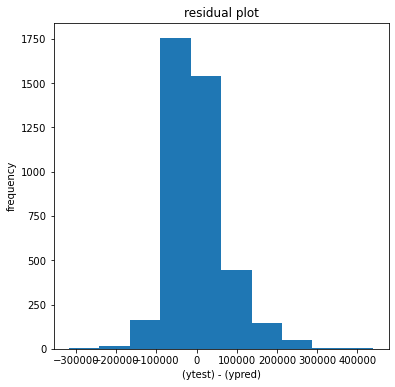

In [38]:
evaluate(lr.predict(X_test),y_test,LinearRegression)

In [39]:
# Regularization

The cross-validated mean accuracy is 63.8042355720906
The cross-validated std accuracy is 2.4191784316271843
root mean squared error for test data   is 71147.17899758717


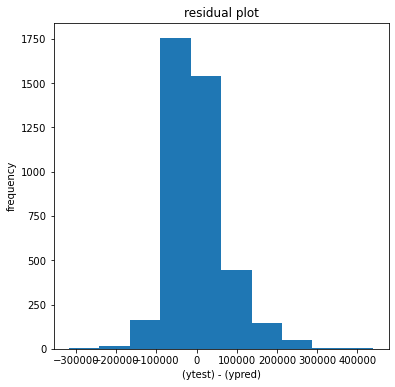

[]

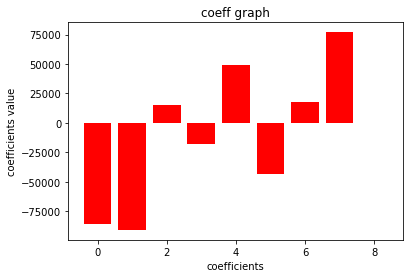

In [40]:
l=regressor_model(X_train,y_train,Lasso)
evaluate(l.predict(X_test),y_test,l)
plt.bar(np.arange(len(l.coef_)),l.coef_,color='red')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')
plt.plot()

The cross-validated mean accuracy is 63.80450920106566
The cross-validated std accuracy is 2.41810729684698
root mean squared error for test data   is 71144.00533364153


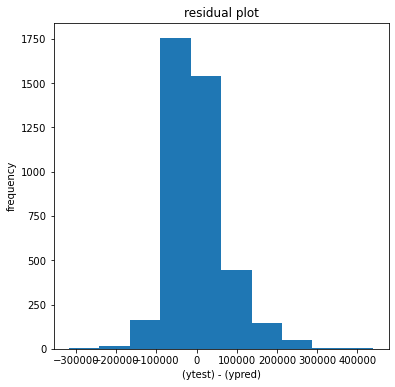

[]

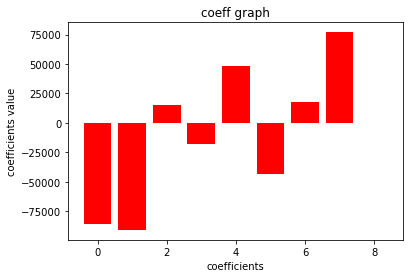

In [129]:
l=regressor_model(X_train,y_train,Ridge)
evaluate(l.predict(X_test),y_test,l)
plt.bar(np.arange(len(l.coef_)),l.coef_,color='red')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')
plt.plot()

The cross-validated mean accuracy is 49.875269843244645
The cross-validated std accuracy is 1.5092622408490604
root mean squared error for test data   is 81718.28114185542


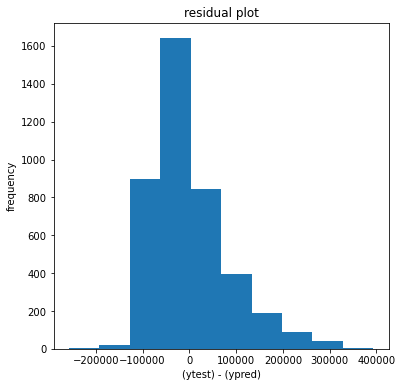

[]

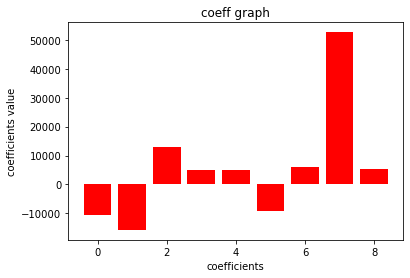

In [41]:
l=regressor_model(X_train,y_train,ElasticNet)
evaluate(l.predict(X_test),y_test,l)
plt.bar(np.arange(len(l.coef_)),l.coef_,color='red')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')
plt.plot()

In [ ]:
# Hyperparameter tuning

In [61]:
params=[{
          #  'n_estimators':[20,30,70,50,100,200,300,400,600,650,630,680],
            'max_depth':[None,10,20,30,40,50,60,70,100],
            'min_samples_split':[2,3,4,5,10],
            'min_samples_leaf' :[1,2,5,7,10],
          #  'bootstrap':[True,False],     #bootstrap not working with decision tree
            'max_features':['sqrt','auto','log2']
}]

In [62]:
# Try with xgboost but taking too long
# Try with r2_score instead of neg_mean_squared_error
gs=GridSearchCV(tree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1)
gs.fit(X_train,y_train)
y_pred=gs.predict(X_test)

In [71]:
print('The best score is', np.sqrt(-gs.best_score_))
print('The best features are', gs.best_params_)

The best score is 59597.476705827794
The best features are {'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 3}


In [75]:
#Using the best estimator to check for differences on the mean squared error
dt=gs.best_estimator_
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print('The mean squared error is ', np.sqrt(mean_squared_error(y_pred,y_test)))

The mean squared error is  58401.34208034443


Text(0.5, 1.0, 'Feature Importance')

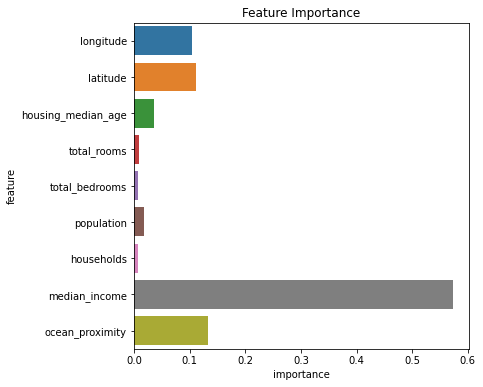

In [86]:
plt.figure(figsize=(6,6))
data=pd.DataFrame({'feature':df.columns[df.columns!='median_house_value'].values,'importance':dt.feature_importances_})
sns.barplot(data=data,y='feature',x='importance')
plt.title('Feature Importance')